In [46]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# df = pd.read_pickle("../comparison/results_s_curve_20_5.pkl")
# df2 = pd.read_pickle("../comparison/results_s_curve_20_5_2.pkl")
# df = pd.concat([df, df2])
# df = df.reset_index(drop=True)
# df.to_pickle("../comparison/results_s_curve_20_5_0.0.1.pkl")

In [185]:
def process_line(means, highlight, highlight_index, highlight_max):
    max_tops = set(means.groupby(highlight_index).idxmax())
    min_tops = set(means.groupby(highlight_index).idxmin())
    if highlight:
        if highlight_max:
            tops = max_tops
        else:
            tops = min_tops
    else:
        tops = set()
    print(tops)

    def process_line(x):
        if x.name in tops:
            return rf"\textbf{{{x['mean']:0.3f} $\pm$ {x['std']:0.3f}}}"
        return rf"{x['mean']:0.3f} $\pm$ {x['std']:0.3f}"

    return process_line


def mean_pm_std(
    data, index, columns, value, highlight=True, highlight_cols=True, highlight_max=True
):
    assert len(data) > 0
    groupby = data.groupby([*index, *columns])
    means = groupby.mean()[value].rename("mean")
    stds = groupby.std()[value].rename("std")
    ddf = pd.concat([means, stds], axis=1).T
    highlight_index = columns if highlight_cols else index
    ddf = ddf.apply(process_line(means, highlight, highlight_index, highlight_max))
    ddf = ddf.reset_index().pivot(index=index, columns=columns)
    ddf.columns = ddf.columns.droplevel(level=0)
    return ddf
    # for i in range(len(means)):
    # means.iloc[i,:]


# mean_pm_std(df[df["datamodule/transform_args/power"] == 1].groupby(["datamodule/transform_args/alpha", "datamodule/dataset"]))

In [227]:
!ls -lah ../comparison

total 550K
drwxrwxr-x 4 alexander.tong alexander.tong   30 Sep 28 15:54 .
drwxrwxr-x 9 alexander.tong alexander.tong   14 Sep 28 11:57 ..
-rw-rw-r-- 1 alexander.tong alexander.tong 9.4K Sep 28 15:30 compare.py
-rw-r--r-- 1 alexander.tong alexander.tong  28K Sep 28 15:32 .compare.py.swj
-rw-r--r-- 1 alexander.tong alexander.tong  24K Sep 28 14:47 .compare.py.swk
-rw-r--r-- 1 alexander.tong alexander.tong  16K Aug 24 16:39 .compare.py.swl
-rw-r--r-- 1 alexander.tong alexander.tong  28K Sep 28 14:45 .compare.py.swm
-rw-r--r-- 1 alexander.tong alexander.tong  20K Aug 24 13:08 .compare.py.swn
-rw-r--r-- 1 alexander.tong alexander.tong  28K Sep 28 13:06 .compare.py.swo
-rw-r--r-- 1 alexander.tong alexander.tong  20K Aug 24 09:25 .compare.py.swp
-rw-rw-r-- 1 alexander.tong alexander.tong  846 Aug 19 16:44 diffusion_emd.py
drwxrwxr-x 2 alexander.tong alexander.tong    2 Sep 27 11:15 .ipynb_checkpoints
-rw-rw-r-- 1 alexander.tong alexander.tong 9.7K Sep 28 15:20 methods.py
-rw-r--r-- 1 alexande

In [241]:
df1 = pd.read_pickle("../comparison/results_swiss_roll_100_10_1.0.5.pkl")
df2 = pd.read_pickle("../comparison/results_swiss_roll_100_2_1.0.3.pkl")
df3 = pd.read_pickle("../comparison/results_swiss_roll_100_10_1.0.6.pkl")
# df4 = pd.read_pickle("../comparison/results_swiss_roll_100_10_1.0.7.pkl")
df5 = pd.read_pickle("../comparison/results_swiss_roll_100_10_1.0.4.pkl")
df = pd.concat([df2, df3, df1, df5])

In [242]:
df["null"] = 0
df

,Method,Seed,# distributions,SpearmanR,P@1,P@5,P@10,P@25,10-NN time (s),All-pairs time(s),null
0,DiffusionEMD,0,100,0.581564,0.170,0.278,0.3670,0.5200,2.425238,3.555554,0
1,Exact,0,100,0.231871,0.120,0.234,0.3150,0.4624,25.297417,25.297417,0
2,Sinkhorn,0,100,0.228817,0.110,0.234,0.3140,0.4608,52.197703,52.197703,0
3,Graph MMD (Chebyshev),0,100,0.600378,0.260,0.356,0.4150,0.5408,0.720160,0.733873,0
4,DiffusionEMD,1,100,0.557449,0.130,0.276,0.3520,0.5208,2.252287,3.399406,0
...,...,...,...,...,...,...,...,...,...,...,...
75,Graph MMD (Chebyshev),9,100,0.606145,0.230,0.354,0.4180,0.5424,0.654408,0.659078,0
76,DiffusionEMD,9,200,0.602344,0.140,0.261,0.3455,0.4228,10.829749,21.792281,0
77,Exact,9,200,0.271633,0.095,0.200,0.2715,0.3830,114.891420,114.891420,0
78,Sinkhorn,9,200,0.268980,0.085,0.190,0.2680,0.3816,150.581925,150.581925,0


In [243]:
df_long = df.melt(
    id_vars=["Method", "Seed", "# distributions", "null"],
    value_vars=df.columns[-8:-1],
)

In [247]:
results = mean_pm_std(
    df_long,
    index=[
        # "# distributions",
        "Method",
    ],
    columns=["variable"],
    value="value",
)

results = results[list(df.columns[-8:-1])]
results = results.drop(columns=["P@1", "P@5", "P@10", "P@25"])
results = results.T[
    [
        "DiffusionEMD",
        "Exact",
        "Sinkhorn",
        "rbf-kernel-MMD",
        "Graph MMD (Exact)",
        "Graph MMD (Chebyshev)",
        #        "Graph MMD (Chebyshev, 8)",
        #        "Graph MMD (Chebyshev, 16)",
        #        "Graph MMD (Chebyshev, 32)",
        #        "Graph MMD (Chebyshev, 64)",
        #        "Graph MMD (Chebyshev, 128)",
    ]
].T
print(results.style.to_latex(hrules=True))
results

{('Graph MMD (Exact)', 'SpearmanR'), ('rbf-kernel-MMD', 'P@10'), ('Graph MMD (Exact)', 'All-pairs time(s)'), ('Graph MMD (Exact)', '10-NN time (s)'), ('rbf-kernel-MMD', 'P@1'), ('rbf-kernel-MMD', 'P@25'), ('rbf-kernel-MMD', 'P@5')}
\begin{tabular}{llll}
\toprule
variable & SpearmanR & 10-NN time (s) & All-pairs time(s) \\
Method &  &  &  \\
\midrule
DiffusionEMD & 0.584 $\pm$ 0.020 & 6.074 $\pm$ 4.386 & 11.617 $\pm$ 9.295 \\
Exact & 0.253 $\pm$ 0.018 & 66.109 $\pm$ 44.056 & 66.109 $\pm$ 44.056 \\
Sinkhorn & 0.250 $\pm$ 0.018 & 114.838 $\pm$ 74.584 & 114.838 $\pm$ 74.584 \\
rbf-kernel-MMD & 0.509 $\pm$ 0.021 & 5.016 $\pm$ 0.237 & 5.016 $\pm$ 0.237 \\
Graph MMD (Exact) & \textbf{0.613 $\pm$ 0.019} & \textbf{139.453 $\pm$ 16.790} & \textbf{139.468 $\pm$ 16.794} \\
Graph MMD (Chebyshev) & 0.609 $\pm$ 0.021 & 1.567 $\pm$ 1.045 & 1.592 $\pm$ 1.058 \\
\bottomrule
\end{tabular}



variable,SpearmanR,10-NN time (s),All-pairs time(s)
Method,,,
DiffusionEMD,0.584 $\pm$ 0.020,6.074 $\pm$ 4.386,11.617 $\pm$ 9.295
Exact,0.253 $\pm$ 0.018,66.109 $\pm$ 44.056,66.109 $\pm$ 44.056
Sinkhorn,0.250 $\pm$ 0.018,114.838 $\pm$ 74.584,114.838 $\pm$ 74.584
rbf-kernel-MMD,0.509 $\pm$ 0.021,5.016 $\pm$ 0.237,5.016 $\pm$ 0.237
Graph MMD (Exact),\textbf{0.613 $\pm$ 0.019},\textbf{139.453 $\pm$ 16.790},\textbf{139.468 $\pm$ 16.794}
Graph MMD (Chebyshev),0.609 $\pm$ 0.021,1.567 $\pm$ 1.045,1.592 $\pm$ 1.058


['DiffusionEMD',
 'Exact',
 'Sinkhorn',
 'rbf-kernel-MMD',
 'Graph MMD (Exact)',
 'Graph MMD (Chebyshev)']

In [245]:
df.Method.unique()

array(['DiffusionEMD', 'Exact', 'Sinkhorn', 'Graph MMD (Chebyshev)',
       'rbf-kernel-MMD', 'Graph MMD (Exact)'], dtype=object)

In [178]:
results.columns

Index(['10-NN time (s)', 'All-pairs time(s)', 'P@1', 'P@10', 'P@25', 'P@5',
       'SpearmanR'],
      dtype='object', name='variable')

In [142]:
results1 = mean_pm_std(
    df,
    index=[
        "# distributions",
        "Method",
    ],
    columns=["null"],
    value="SpearmanR",
)
results1.columns = ["SpearmanR"]
results2 = mean_pm_std(
    df,
    index=[
        "# distributions",
        "Method",
    ],
    columns=["null"],
    value="10-NN time (s)",
    highlight_max=False,
)
results2.columns = ["10-NN time (s)"]
results = pd.concat([results2, results1], axis=1)
results

10-NN time (s)  \
# distributions Method                                              
100             DiffusionEMD                    2.339 $\pm$ 0.122   
                Exact                          26.295 $\pm$ 1.410   
                Graph MMD (Chebyshev)  \textbf{0.696 $\pm$ 0.034}   
                Sinkhorn                       49.502 $\pm$ 3.812   

                                                        SpearmanR  
# distributions Method                                             
100             DiffusionEMD                    0.570 $\pm$ 0.017  
                Exact                           0.240 $\pm$ 0.011  
                Graph MMD (Chebyshev)  \textbf{0.591 $\pm$ 0.014}  
                Sinkhorn                        0.237 $\pm$ 0.012

In [147]:
print(results.style.to_latex(hrules=True))

\begin{tabular}{lllll}
\toprule
 &  & SpearmanR & 10-NN time (s) & All-pairs time(s) \\
# distributions & Method &  &  &  \\
\midrule
\multirow[c]{4}{*}{100} & DiffusionEMD & 0.570 $\pm$ 0.017 & 2.339 $\pm$ 0.122 & 3.477 $\pm$ 0.110 \\
 & Exact & 0.240 $\pm$ 0.011 & 26.295 $\pm$ 1.410 & 26.295 $\pm$ 1.410 \\
 & Graph MMD (Chebyshev) & \textbf{0.591 $\pm$ 0.014} & \textbf{0.696 $\pm$ 0.034} & \textbf{0.709 $\pm$ 0.035} \\
 & Sinkhorn & 0.237 $\pm$ 0.012 & 49.502 $\pm$ 3.812 & 49.502 $\pm$ 3.812 \\
\bottomrule
\end{tabular}



In [146]:
results1 = mean_pm_std(
    df,
    index=[
        "# distributions",
        "Method",
    ],
    columns=["null"],
    value="SpearmanR",
)
results1.columns = ["SpearmanR"]
results2 = mean_pm_std(
    df,
    index=[
        "# distributions",
        "Method",
    ],
    columns=["null"],
    value="10-NN time (s)",
    highlight_max=False,
)
results2.columns = ["10-NN time (s)"]
results3 = mean_pm_std(
    df,
    index=[
        "# distributions",
        "Method",
    ],
    columns=["null"],
    value="All-pairs time(s)",
    highlight_max=False,
)

results3.columns = ["All-pairs time(s)"]
results = pd.concat([results1, results2, results3], axis=1)
results

SpearmanR  \
# distributions Method                                              
100             DiffusionEMD                    0.570 $\pm$ 0.017   
                Exact                           0.240 $\pm$ 0.011   
                Graph MMD (Chebyshev)  \textbf{0.591 $\pm$ 0.014}   
                Sinkhorn                        0.237 $\pm$ 0.012   

                                                   10-NN time (s)  \
# distributions Method                                              
100             DiffusionEMD                    2.339 $\pm$ 0.122   
                Exact                          26.295 $\pm$ 1.410   
                Graph MMD (Chebyshev)  \textbf{0.696 $\pm$ 0.034}   
                Sinkhorn                       49.502 $\pm$ 3.812   

                                                All-pairs time(s)  
# distributions Method                                             
100             DiffusionEMD                    3.477 $\pm$ 0.110  
                Exact                          26.295 $\pm$ 1.410  
                Graph MMD (Chebyshev)  \textbf{0.709 $\pm$ 0.035}  
                Sinkhorn                       49.502 $\pm$ 3.812

In [111]:
from MultiscaleEMD import dataset

In [120]:
ds = dataset.SklearnDataset(
    "swiss_roll", n_distributions=200, n_points_per_distribution=50, random_state=42
)

In [131]:
ds = dataset.SwissRoll(
    n_distributions=200, n_points_per_distribution=50, random_state=42
)

In [132]:
ds.X

array([[12.35691111, -0.8629572 , -1.48975145],
       [12.52307666,  0.85543556, -0.44387687],
       [11.79325439,  0.93941759, -3.43393432],
       ...,
       [-9.47713792,  0.14875261, -1.04898352],
       [ 4.45161139,  1.74483972,  5.64092913],
       [ 5.41533199,  2.54218005,  4.37680907]])

In [133]:
true_coords = np.stack([ds.means[:, 1], ds.t / 10], axis=1)

from sklearn.metrics import pairwise_distances

dists = pairwise_distances(true_coords)

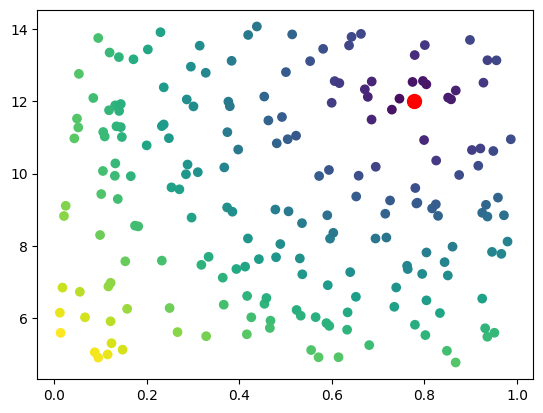

In [134]:
plt.scatter(ds.means[:, 1], ds.t, c=dists[0])
plt.scatter(ds.means[:1, 1], ds.t[:1], c="r", s=100)

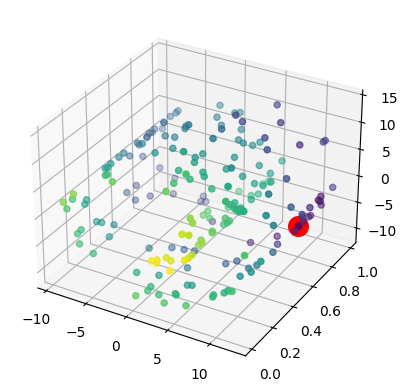

In [135]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*ds.means.T, c=dists[0])
ax.scatter(*ds.means[:1, :].T, s=200, c="r")

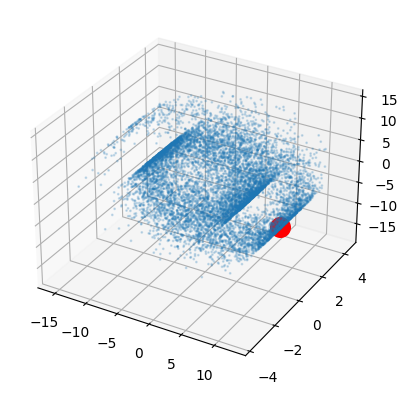

In [136]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*ds.X.T, s=1, alpha=0.2)
ax.scatter(*ds.means[:1, :].T, s=200, c="r")

In [8]:
df_mean = df.groupby(["Method", "# distributions"]).mean()

<AxesSubplot:xlabel='10-NN time (s)', ylabel='SpearmanR'>

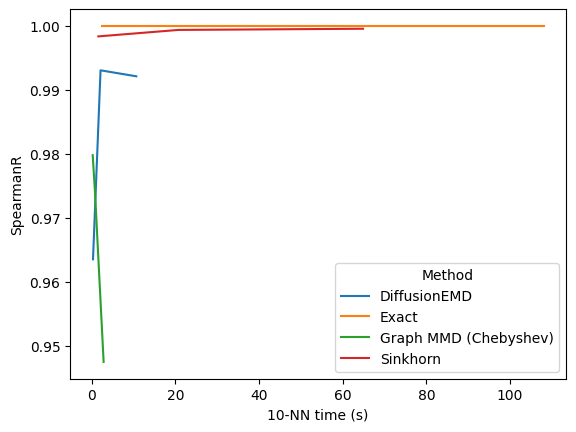

In [9]:
sns.lineplot(data=df_mean, x="10-NN time (s)", y="SpearmanR", hue="Method")

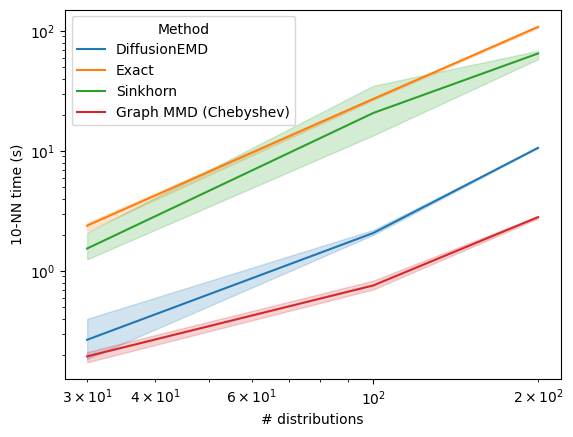

In [10]:
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="# distributions", y="10-NN time (s)", hue="Method")
plt.xscale("log")
plt.yscale("log")

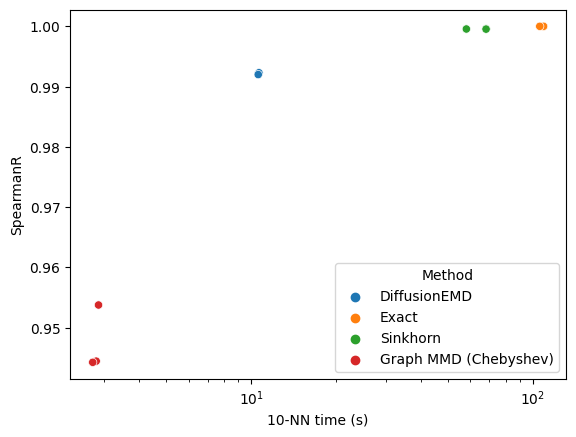

In [11]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["# distributions"] == 200],
    x="10-NN time (s)",
    y="SpearmanR",
    hue="Method",
)
plt.xscale("log")

In [13]:
# Best fit line
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    """Pareto frontier selection process"""
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)

    """Plotting process"""
    plt.scatter(Xs, Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.plot(pf_X, pf_Y)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.show()

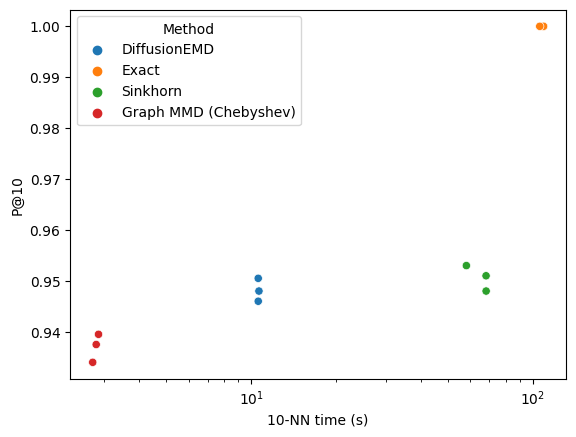

In [14]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["# distributions"] == 200],
    x="10-NN time (s)",
    y="P@10",
    hue="Method",
)
plt.xscale("log")

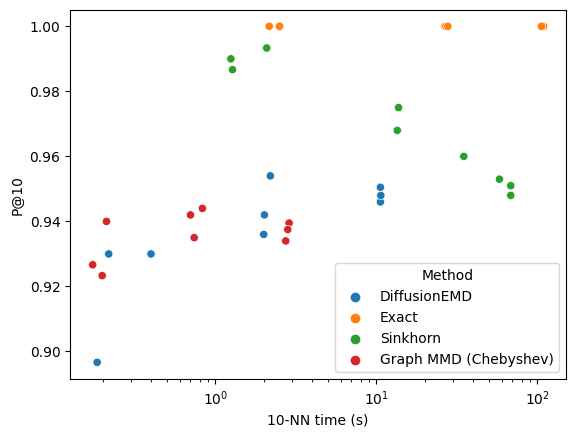

In [15]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="10-NN time (s)",
    y="P@10",
    hue="Method",
)
plt.xscale("log")

In [17]:
df.sort_values("SpearmanR")

,Method,Seed,# distributions,SpearmanR,P@1,P@5,P@10,P@25,10-NN time (s),All-pairs time(s)
24,DiffusionEMD,2,30,0.942188,0.933333,0.866667,0.896667,0.946667,0.184827,0.208321
35,Graph MMD (Chebyshev),2,200,0.944242,0.800000,0.921000,0.934000,0.934400,2.737937,2.771294
23,Graph MMD (Chebyshev),1,200,0.944439,0.875000,0.924000,0.937500,0.929000,2.817357,2.843161
11,Graph MMD (Chebyshev),0,200,0.953755,0.875000,0.942000,0.939500,0.937200,2.871422,2.893249
19,Graph MMD (Chebyshev),1,100,0.968673,0.910000,0.932000,0.942000,0.940800,0.701536,0.719158
0,DiffusionEMD,0,30,0.973556,0.866667,0.926667,0.930000,0.973333,0.399022,0.417363
7,Graph MMD (Chebyshev),0,100,0.974650,0.870000,0.922000,0.944000,0.950400,0.831452,0.847066
12,DiffusionEMD,1,30,0.974816,0.933333,0.906667,0.930000,0.965333,0.218038,0.239984
31,Graph MMD (Chebyshev),2,100,0.978240,0.890000,0.928000,0.935000,0.945200,0.740119,0.751797
3,Graph MMD (Chebyshev),0,30,0.979207,0.866667,0.966667,0.923333,0.980000,0.198609,0.199805
